# Reto: House Prices

### Import dataset

In [ ]:
!pip install kaggle

In [ ]:
!touch kaggle.json

with open("kaggle.json", mode="wt") as f:
  f.write("{\"username\":\"daviddamiangalan\",\"key\":\"eea75be095b638ff1cff4f6bccf00e84\"}")

f.close()

!cat kaggle.json

{"username":"daviddamiangalan","key":"eea75be095b638ff1cff4f6bccf00e84"}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c house-prices-advanced-regression-techniques
!unzip house-prices-advanced-regression-techniques.zip -d "/content/"

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 75.6MB/s]
Archive:  house-prices-advanced-regression-techniques.zip
  inflating: /content/data_description.txt  
  inflating: /content/sample_submission.csv  
  inflating: /content/test.csv       
  inflating: /content/train.csv      


## Exploratory Data Analysis & Data Cleaning

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
pd.set_option("display.max_columns", None)

In [ ]:
housing = pd.read_csv("train.csv")

In [ ]:
kaggle_test = pd.read_csv("test.csv")

### Data Description


MSSubClass: Identifies the type of dwelling involved in the sale.

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.

       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park
       RM	Residential Medium Density

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel
       Pave	Paved

Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

LotShape: General shape of property

       Reg	Regular
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

Utilities: Type of utilities available

       AllPub	All public Utilities (E,G,W,& S)
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only

LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

LandSlope: Slope of property

       Gtl	Gentle slope
       Mod	Moderate Slope
       Sev	Severe Slope

Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

Condition1: Proximity to various conditions

       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street
       Norm	Normal
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

Condition2: Proximity to various conditions (if more than one is present)

       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street
       Norm	Normal
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

BldgType: Type of dwelling

       1Fam	Single-family Detached
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

HouseStyle: Style of dwelling

       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed

RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles

Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

ExterCond: Evaluates the present condition of the material on the exterior

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

Foundation: Type of foundation

       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete
       Slab	Slab
       Stone	Stone
       Wood	Wood

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace

HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

CentralAir: Central air conditioning

       N	No
       Y	Yes

Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

GarageType: Garage location

       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished
       Unf	Unfinished
       NA	No Garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

PavedDrive: Paved driveway

       Y	Paved
       P	Partial Pavement
       N	Dirt/Gravel

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

Fence: Fence quality

       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

MiscFeature: Miscellaneous feature not covered in other categories

       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale

       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)


### Exploratory Data Analysis

In [ ]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
kaggle_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
kaggle_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


Algo que observamos a primera vista es que se ha considerado la variable MSSubclass como un número, lo cual es incorrecto ya que es un dato categórico.
Por lo tanto, cambiaremos el tipo de dato.

In [ ]:
housing["MSSubClass"] = housing["MSSubClass"].astype(str)

### Imputation

In [ ]:
nan_cols = housing.isnull().sum()
nan_cols.loc[nan_cols != 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [ ]:
nan_cols = kaggle_test.isnull().sum()
nan_cols.loc[nan_cols != 0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [ ]:
# For LotFrontage, replace NULL with 0 as it is a numerical value
housing["LotFrontage"].fillna(0, inplace=True)
kaggle_test["LotFrontage"].fillna(0, inplace=True)
# For alley, replace the NULL categorical value to existing "NA"
housing["Alley"].fillna("NA", inplace=True)
kaggle_test["Alley"].fillna("NA", inplace=True)
# For MasVnrType there exists the NULL categorical value, which is "None"
# Set the area as well to 0
housing["MasVnrType"].fillna("None", inplace=True)
kaggle_test["MasVnrType"].fillna("None", inplace=True)
housing["MasVnrArea"].fillna(0, inplace=True)
kaggle_test["MasVnrArea"].fillna(0, inplace=True)
# For basement features, set all categorical NULLs to value "NA"
housing["BsmtQual"].fillna("NA", inplace=True)
kaggle_test["BsmtQual"].fillna("NA", inplace=True)
housing["BsmtCond"].fillna("NA", inplace=True)
kaggle_test["BsmtCond"].fillna("NA", inplace=True)
housing["BsmtExposure"].fillna("NA", inplace=True)
kaggle_test["BsmtExposure"].fillna("NA", inplace=True)
housing["BsmtFinType1"].fillna("NA", inplace=True)
kaggle_test["BsmtFinType1"].fillna("NA", inplace=True)
housing["BsmtFinType2"].fillna("NA", inplace=True)
kaggle_test["BsmtFinType2"].fillna("NA", inplace=True)
# For electrical, there is no value for NULL, so we create the new "NA"
housing["Electrical"].fillna("NA", inplace=True)
kaggle_test["Electrical"].fillna("NA", inplace=True)
# For fireplace quality, assign the NULL categorical value "NA"
housing["FireplaceQu"].fillna("NA", inplace=True)
kaggle_test["FireplaceQu"].fillna("NA", inplace=True)
# For garage features, set all categorical NULLs to value "NA"
housing["GarageType"].fillna("NA", inplace=True)
kaggle_test["GarageType"].fillna("NA", inplace=True)
housing["GarageFinish"].fillna("NA", inplace=True)
kaggle_test["GarageFinish"].fillna("NA", inplace=True)
housing["GarageQual"].fillna("NA", inplace=True)
kaggle_test["GarageQual"].fillna("NA", inplace=True)
housing["GarageCond"].fillna("NA", inplace=True)
kaggle_test["GarageCond"].fillna("NA", inplace=True)
# For garage year built, we put a default value of 0 to identify no value
# Furthermore, this value will be easier to set for prediction in the
# production model (unlike the mean of median, which must be hardcoded)
# once the model is served
housing["GarageYrBlt"].fillna(0, inplace=True)
kaggle_test["GarageYrBlt"].fillna(0, inplace=True)
# For pool quality, assign the NULL categorical value to "NA"
housing["PoolQC"].fillna("NA", inplace=True)
kaggle_test["PoolQC"].fillna("NA", inplace=True)
# For fence quality, assign the NULL categorical value to "NA"
housing["Fence"].fillna("NA", inplace=True)
kaggle_test["Fence"].fillna("NA", inplace=True)
# For miscelaneous feature, assign the NULL categorical value to "NA"
housing["MiscFeature"].fillna("NA", inplace=True)
kaggle_test["MiscFeature"].fillna("NA", inplace=True)
# For MSZoning, there is no NA, let's assign the first category, "A"
kaggle_test["MSZoning"].fillna("A", inplace=True)

kaggle_test["BsmtFinSF1"].fillna(0, inplace=True)
kaggle_test["BsmtFinSF2"].fillna(0, inplace=True)
kaggle_test["BsmtUnfSF"].fillna(0, inplace=True)
kaggle_test["TotalBsmtSF"].fillna(0, inplace=True)
kaggle_test["GarageArea"].fillna(0, inplace=True)

In [ ]:
nan_cols = housing.isnull().sum()
nan_cols.loc[nan_cols != 0]

Series([], dtype: int64)

In [ ]:
nan_cols = ~housing[housing == "NA"].isnull()
na_sum = nan_cols.sum()
percentage = na_sum.loc[na_sum != 0].apply(lambda x : x / len(housing))
percentage

Alley           0.937671
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

Existen varias columnas que tienen un alto porcentaje de valores faltantes, Alley, con 93%, FireplaceQu, con 47%, PoolQC con 99%, Fence con 80% y MiscFeature con 96%.

### Dataset split into training, validation and test

In [ ]:
from sklearn.model_selection import train_test_split
x_train_tmp, x_test, y_train_tmp, y_test = train_test_split(
    housing.drop(columns=["Id", "SalePrice"]),
    housing["SalePrice"],
    test_size=0.2,
    random_state=42)

x_train, x_val, y_train, y_val = train_test_split(
    x_train_tmp,
    y_train_tmp,
    test_size=0.2,
    random_state=42
)

print(f"Observations in training dataset: {len(x_train)}")
print(f"Observations in validation dataset: {len(x_val)}")
print(f"Observations in test dataset: {len(x_test)}")

Observations in training dataset: 934
Observations in validation dataset: 234
Observations in test dataset: 292


### Data visualization

In [ ]:
def plot_features(x_train, y_train, plot_type):
  num_cols = 4
  numerical_features = x_train.select_dtypes(include="number").columns
  num_rows = (len(numerical_features) + num_cols) // num_cols
  fig, axes = plt.subplots(num_rows,
                          num_cols, figsize=(8,18))

  for i, feature in enumerate(numerical_features):
    ax = axes[i // num_cols][i % num_cols]
    if plot_type == "hist":
      ax.hist(x_train[feature], bins=15, alpha=0.5)
      ax.axvline(x_train[feature].mean(), color="red", linestyle="dashed",
                linewidth=1, label="Mean")
      ax.axvline(x_train[feature].median(), color="blue", linestyle="dashed",
                linewidth=1, label="Median")
    elif (plot_type == "boxplot"):
      x_train.boxplot(column=feature, ax=ax)
    ax.set_title(feature)

  # Predicted variable
  ax = axes[len(numerical_features) // num_cols][len(numerical_features) % num_cols]
  if plot_type == "hist":
    ax.hist(y_train, bins=15, alpha=0.5)
    ax.axvline(y_train.mean(), color="red", linestyle="dashed",
                linewidth=1, label="Mean")
    ax.axvline(y_train.median(), color="blue", linestyle="dashed",
                linewidth=1, label="Median")
    ax.set_title("SalePrice")
  elif plot_type == "boxplot":
    tmp_df = pd.DataFrame()
    tmp_df["y"] = y_train
    tmp_df.boxplot(column="y", ax=ax)
    ax.set_title("SalePrice")

  plt.tight_layout()
  plt.show()

In [ ]:
# Numerical features
numerical_features = x_train.select_dtypes(include="number").columns
len(numerical_features)

35

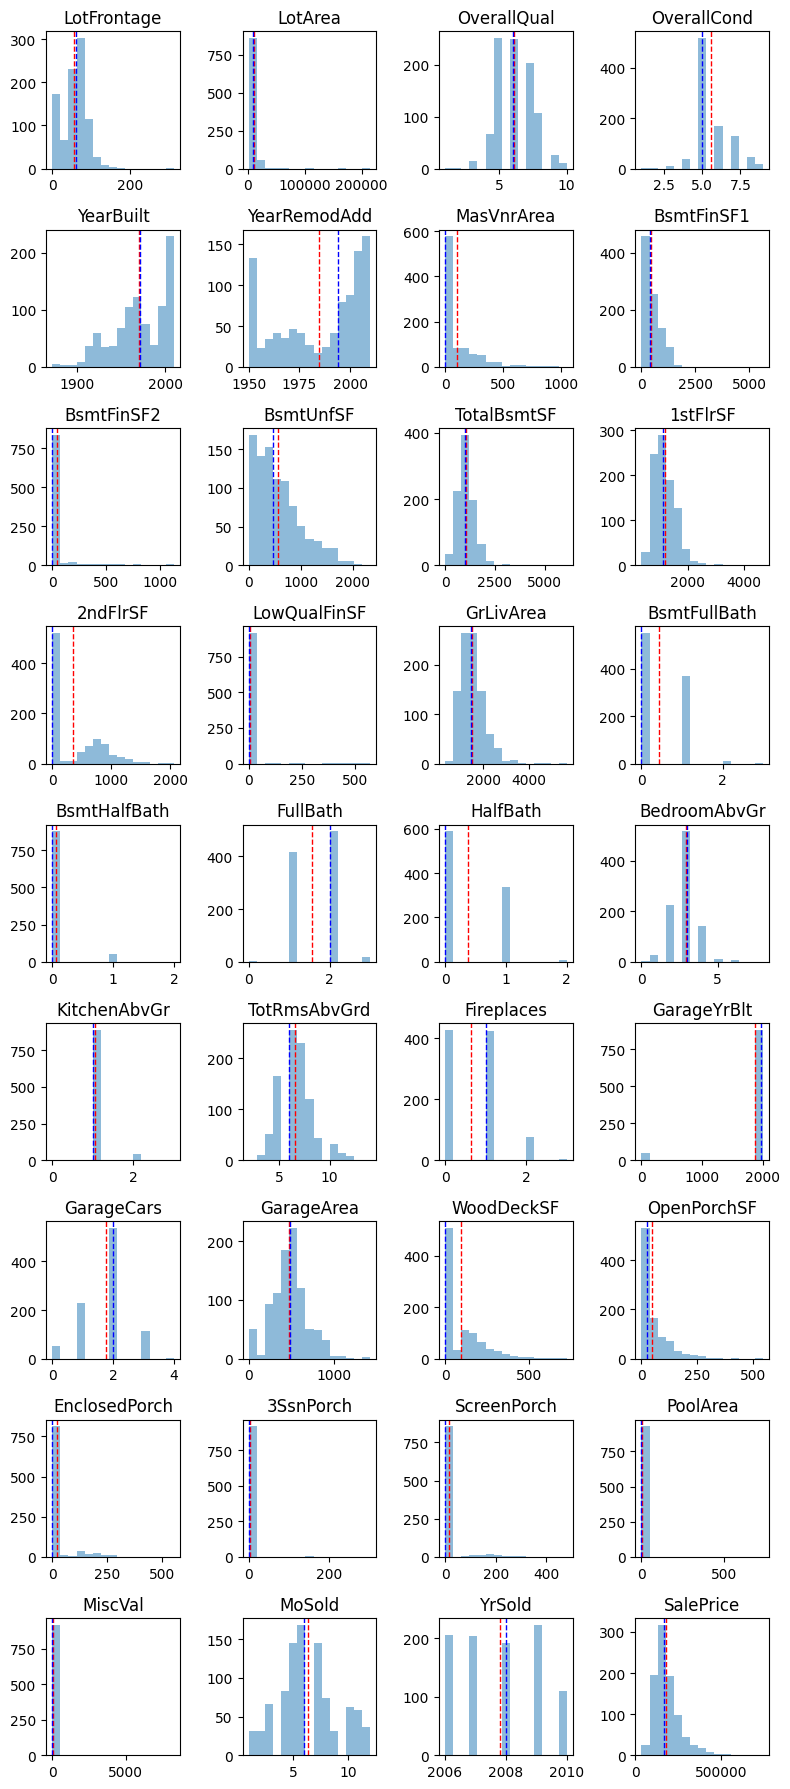

In [ ]:
plot_features(x_train, y_train, plot_type="hist")

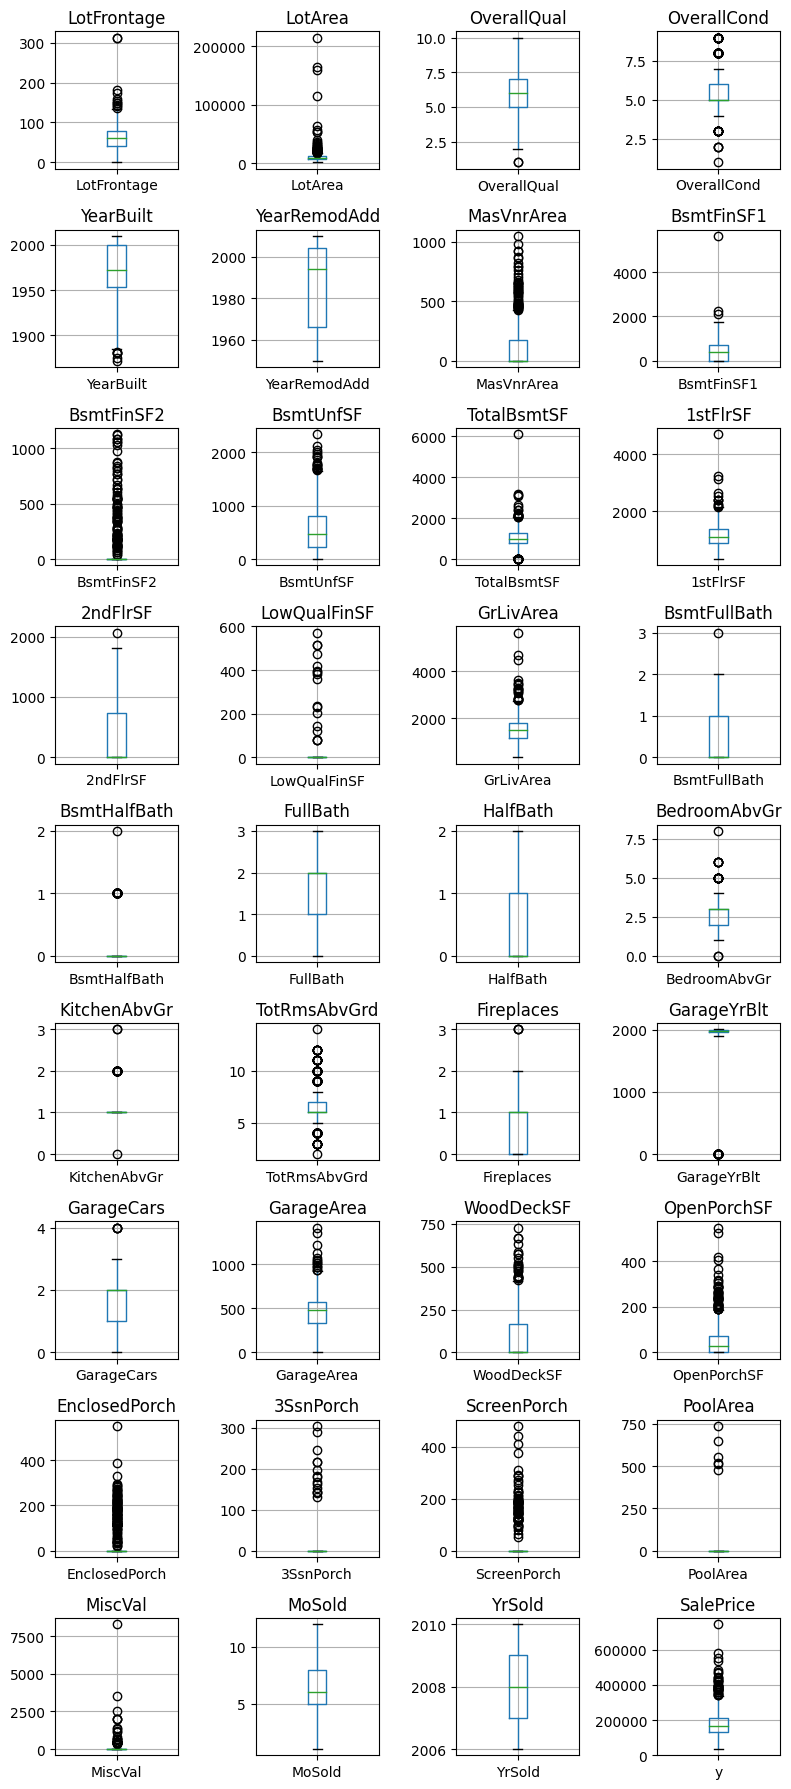

In [ ]:
plot_features(x_train, y_train, plot_type="boxplot")

In [ ]:
def perform_anderson_darling(x_train, y_train):
  def anderson_darling(feature, values, ax):
    anderson_result = stats.anderson(values)
    print(f"*** {feature} ***")
    print(f"Statistic: {anderson_result.statistic}")
    print(f"Critical values: {anderson_result.critical_values}")
    print(f"Significance levels: {anderson_result.significance_level}")
    if (anderson_result.statistic \
        < anderson_result.critical_values[2]):
      print("NORMAL")
    else:
      print("NOT NORMAL")
    ax.plot(anderson_result.significance_level, anderson_result.critical_values,
            marker="o", linestyle="none")
    ax.axhline(anderson_result.statistic, color="red", linestyle="dashed",
              linewidth=1, label="Mean")
    ax.set_title(feature)
    ax.set_xlabel("Significance level")
    ax.set_ylabel("Critical values")

  # Anderson-Darling Test
  # 95% confidence level
  num_cols = 4
  numerical_features = x_train.select_dtypes(include="number").columns
  num_rows = (len(numerical_features) + num_cols) // num_cols
  fig, axes = plt.subplots(num_rows,
                          num_cols, figsize=(8,18))

  for i, feature in enumerate(numerical_features):
    ax = axes[i // num_cols][i % num_cols]
    anderson_darling(feature, x_train[feature], ax)

  # Predicted variable
  ax = axes[len(numerical_features) // num_cols][
      len(numerical_features) % num_cols]
  anderson_darling("SalePrice", y_train, ax)

  plt.tight_layout()
  plt.show()


*** LotFrontage ***
Statistic: 28.000660627149273
Critical values: [0.574 0.653 0.784 0.914 1.087]
Significance levels: [15.  10.   5.   2.5  1. ]
NOT NORMAL
*** LotArea ***
Statistic: 149.56539574953536
Critical values: [0.574 0.653 0.784 0.914 1.087]
Significance levels: [15.  10.   5.   2.5  1. ]
NOT NORMAL
*** OverallQual ***
Statistic: 22.73083429603753
Critical values: [0.574 0.653 0.784 0.914 1.087]
Significance levels: [15.  10.   5.   2.5  1. ]
NOT NORMAL
*** OverallCond ***
Statistic: 78.79563917880841
Critical values: [0.574 0.653 0.784 0.914 1.087]
Significance levels: [15.  10.   5.   2.5  1. ]
NOT NORMAL
*** YearBuilt ***
Statistic: 19.62546424139714
Critical values: [0.574 0.653 0.784 0.914 1.087]
Significance levels: [15.  10.   5.   2.5  1. ]
NOT NORMAL
*** YearRemodAdd ***
Statistic: 46.459615173886505
Critical values: [0.574 0.653 0.784 0.914 1.087]
Significance levels: [15.  10.   5.   2.5  1. ]
NOT NORMAL
*** MasVnrArea ***
Statistic: 110.17124448004279
Critical va

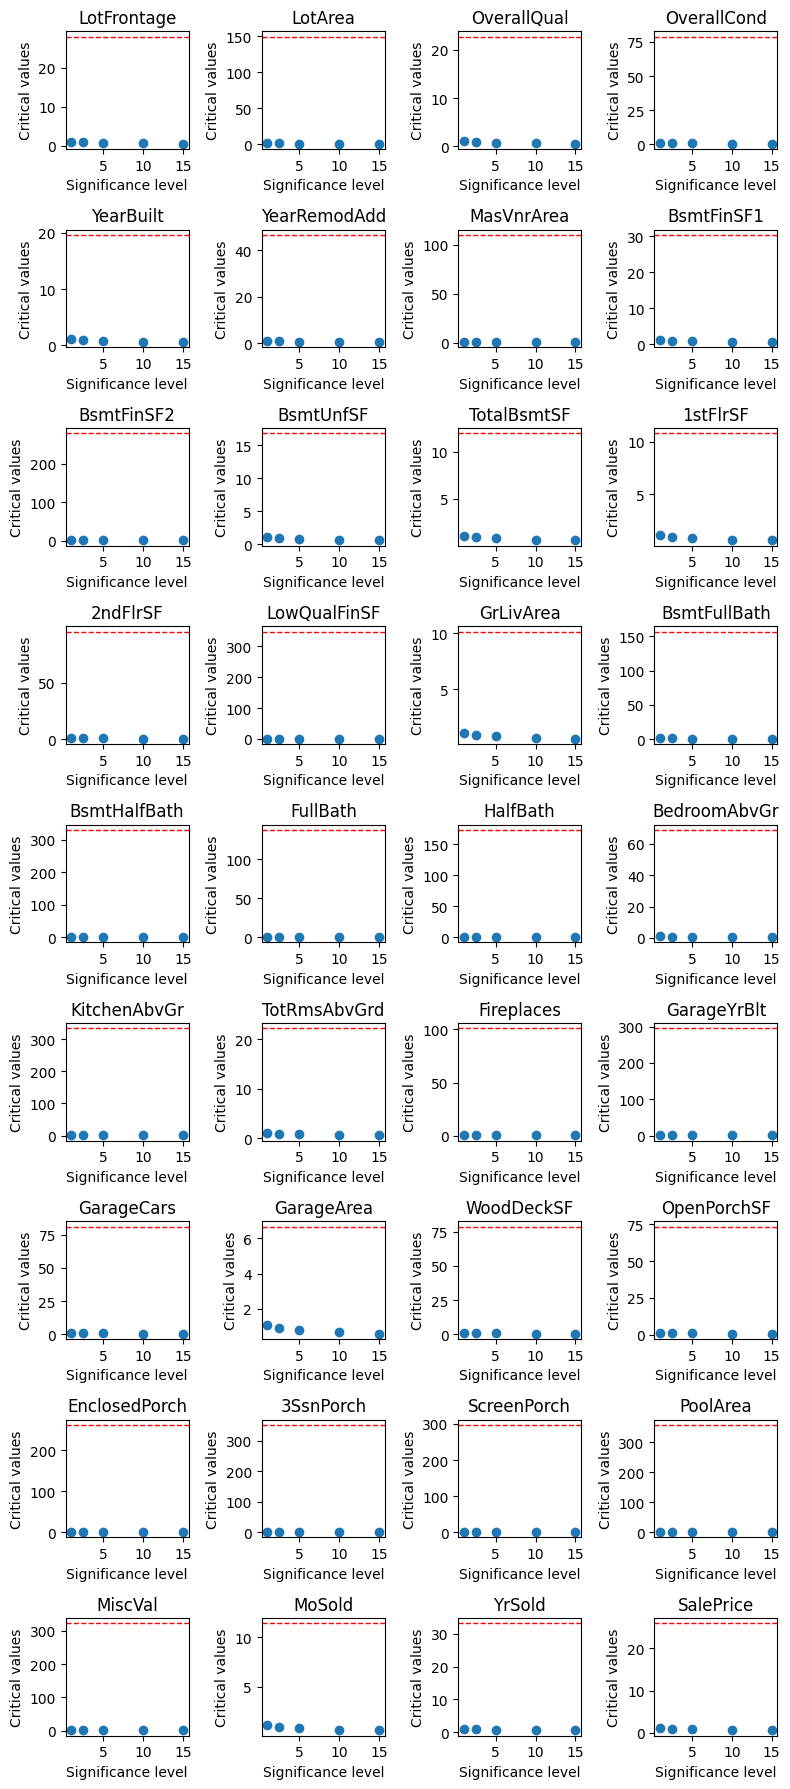

In [ ]:
perform_anderson_darling(x_train, y_train)

Preguntas de la Actividad 4

1) ¿Qué variables presentan datos atípicos? Para este punto utilizar Boxplots

Como se puede apreciar en las gráficas, todas las variables numéricas excepto YeadRemodAdd, FullBath, HalfBath, MoSold y YrSold tienen datos atípicos. Nos interesan sobre todo los datos atípicos de la variable de SalePrice, ya que es la variable que queremos predecir y los valores más extremos podrían afectar la predicción. Para las demás variables, existe un subconjuto para el cual los rangos intercuartiles se encuentran alrededor de 0 (implicando que la gran mayoría de la muestra no cuenta con esa variable), y los outliers tienen valores muy grandes. Por ejemplo, el área de piscina. La mayoría de casas indica que no tiene piscina y las que sí la tienen es muy grande. Habrá que revisar cómo afecta eso al precio final de venta.

2) ¿En qué variables identifica un tipo de sesgo? Usar histogramas

Se observa sesgo en todas las variables, pero sobre todo en la variable de SalePrice, existe un sesgo hacia la izquierda, dado que la cola derecha es más larga. En las demás variables, identificamos el sesgo cuando el valor de la media es diferente al valor de la mediana.

3) ¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

La línea roja representa el resultado de el estadístico de Anderson-Darling para cada variable. En este caso, existe evidencia para descartar una distribución normal en todas las variables.

4) ¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

En todos los histogramas se muestra en color rojo el valor de la media y en color azul el de la mediana. De estos podemos decir que los valores son bastante similares.

5) ¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué?

Como no hay una distribución normal que podamos identificar mediante la media y desviación estándar, todas las variables pueden identificarse mediante los rangos intercuartiles (vistos en las boxplot).


## Preprocesamiento y escalamiento

Como podemos observar en figuras anteriores, las variables presentan una gran diferencia en los rangos de sus valores. Además, la variable que queremos predecir (el precio) tiene un sesgo muy pronunciado. Una manera de resolver esto es aplicando una transformación logarítmica, de manera que las casas de mayor precio se encuentren en un rango mucho más estrecho. Como hay valores iguales a 0, sumaremos una constante pequeña para poder aplicar el logaritmo sin afectar los datos. Posteriormente, aplicaremos un escalamiento del tipo "standard scaling", para que en cada variable la media tenga valor de 0 y la desviación estándar de 1.

In [ ]:
from math import log

def scale_dataset(x_train, y_train):
  numerical_features = x_train.select_dtypes(include="number").columns
  x_train_scaled = pd.DataFrame()
  for feature in numerical_features:
    x_train_scaled[feature] = x_train[feature].apply(
        lambda x : log(x + 0.0001))

  y_train_scaled = y_train.apply(lambda x : log(x + 0.0001))

  for feature in numerical_features:
    mean = x_train_scaled[feature].mean()
    std = x_train_scaled[feature].std()
    x_train_scaled[feature] = x_train_scaled[feature].apply(
        lambda x : (x - mean) / std)

  y_train_mean = y_train_scaled.mean()
  y_train_std = y_train_scaled.std()
  y_train_scaled = y_train_scaled.apply(
      lambda x : (x - y_train_mean) / y_train_std)

  return (x_train_scaled, y_train_scaled)

In [ ]:
x_train_ori = x_train.copy(deep=True)
y_train_ori = y_train.copy(deep=True)
x_val_ori = x_val.copy(deep=True)
y_val_ori = y_val.copy(deep=True)
x_test_ori = x_test.copy(deep=True)
y_test_ori = y_test.copy(deep=True)

In [ ]:
x_train_scaled, y_train_scaled = scale_dataset(x_train, y_train)
x_val_scaled, y_val_scaled = scale_dataset(x_val, y_val)
x_test_scaled, y_test_scaled = scale_dataset(x_test, y_test)

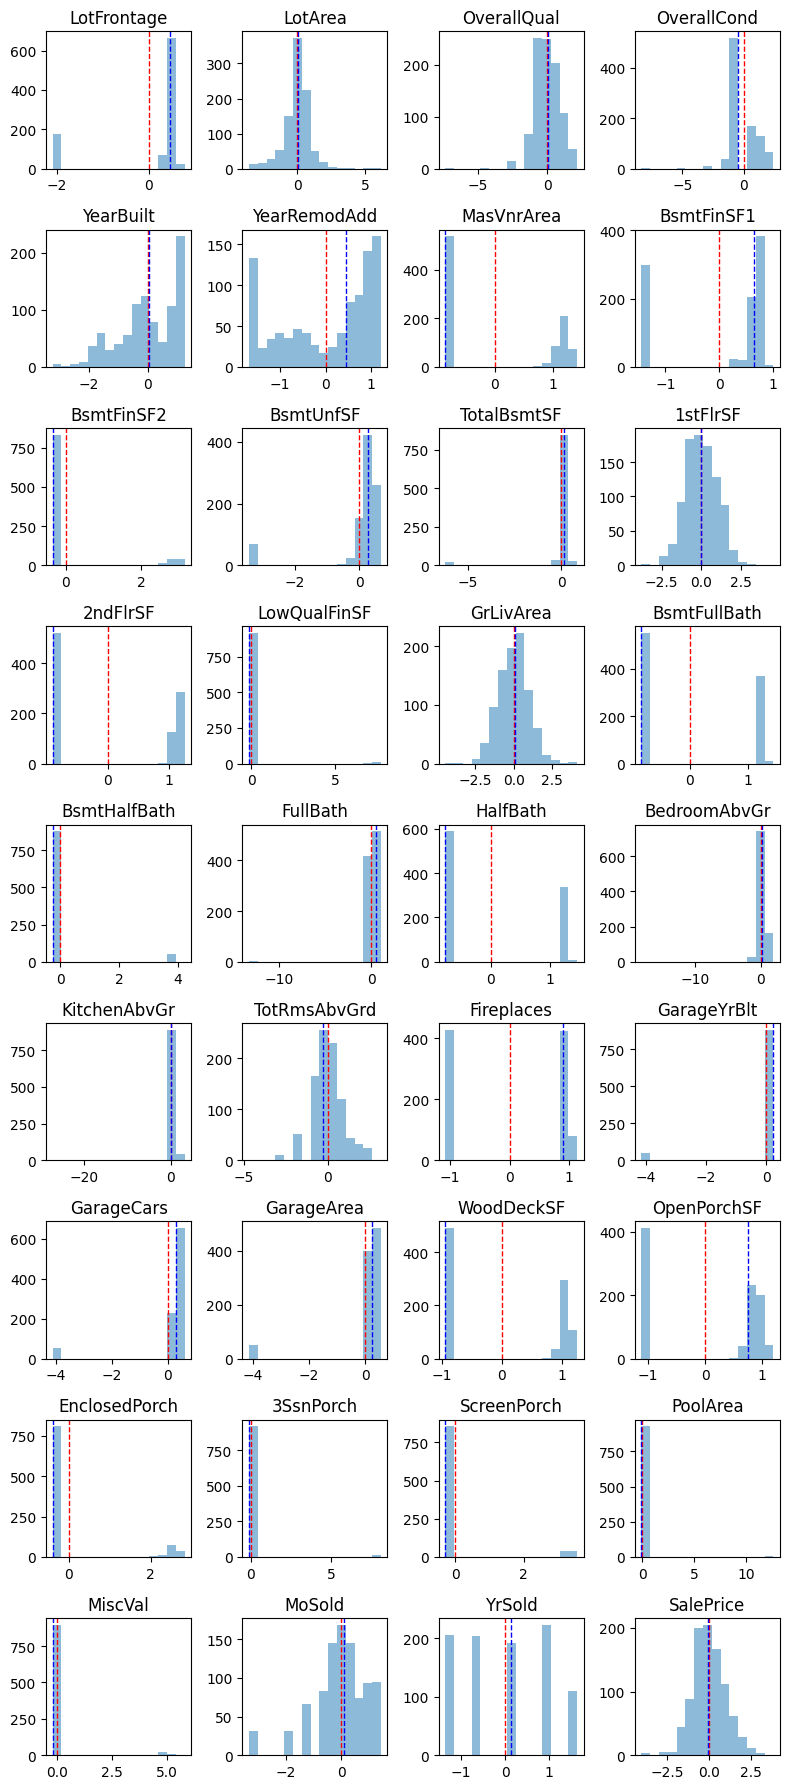

In [ ]:
plot_features(x_train_scaled, y_train_scaled, plot_type="hist")

Vemos cómo solamente aplicando esta transformación, ahora la variable que queremos predecir tiene una forma mucho más parecida a la distribución normal.

### Tratamiento de outliers

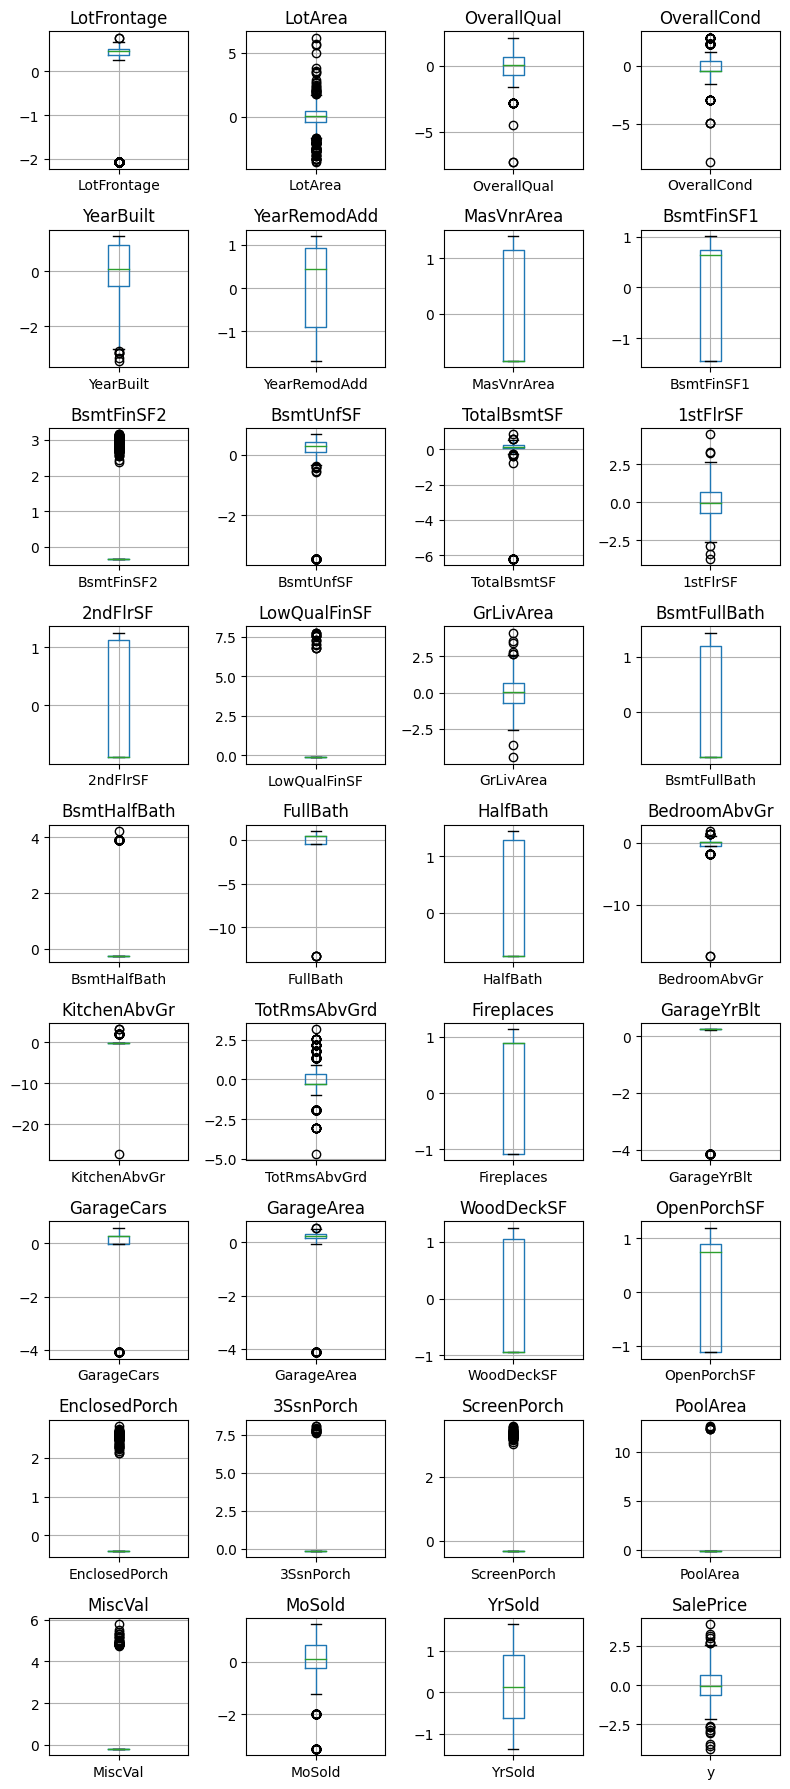

In [ ]:
plot_features(x_train_scaled, y_train_scaled, plot_type="boxplot")

Vemos que existen varios outliers que podrían afectar negativamente al modelo. Además, parece que hay muchos más outliers del lado de los positivos, lo que podría estar diciendo que hay muy pocas casas que tienen estas características, y estas podrían estar causando un incremento de precio. Esto podría tratarse posteriormente agregando variables dummy.

## Selección de variables de entrenamiento

Siendo este un problema de regresión, podemos comenzar por ocupar un modelo de regresión lineal y ver qué tan bien se adapta a los datos.

Para primero obtener información estadística del modelo, utilizaremos la función OLS de la librería statsmodels.

In [ ]:
import statsmodels.api as sm

x_train_scaled = sm.add_constant(x_train_scaled)

In [ ]:
def ols(x_train, y_train):
  return sm.OLS(y_train, x_train).fit()


In [ ]:
sm.OLS(y_train_scaled, x_train_scaled).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     164.2
Date:                Sat, 16 Sep 2023   Prob (F-statistic):               0.00
Time:                        06:36:46   Log-Likelihood:                -390.21
No. Observations:                 934   AIC:                             852.4
Df Residuals:                     898   BIC:                             1027.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          9.703e-15      0.012   7.91e-13      1.000      -0.024       0.024
LotFrontage       0.0103      0.013      0.800      0.424      -0.015       0.035
LotArea           0.1169      0.015      7.728      0.000       0.087       0.147
OverallQual       0.2500      0.021     11.836      0.000       0.209       0.291
OverallCond       0.1084      0.015      6.995      0.000       0.078       0.139
YearBuilt         0.2351      0.025      9.440      0.000       0.186       0.284
YearRemodAdd      0.0859      0.018      4.765      0.000       0.051       0.121
MasVnrArea       -0.0269      0.015     -1.827      0.068      -0.056       0.002
BsmtFinSF1        0.0733      0.017      4.281      0.000       0.040       0.107
BsmtFinSF2       -0.0332      0.014     -2.453      0.014      -0.060      -0.007
BsmtUnfSF        -0.0094      0.017     -0.559      0.576      -0.042       0.024
TotalBsmtSF       0.0305      0.017      1.750      0.080      -0.004       0.065
1stFlrSF          0.0067      0.048      0.141      0.888      -0.087       0.100
2ndFlrSF         -0.1000      0.047     -2.129      0.034      -0.192      -0.008
LowQualFinSF     -0.0084      0.014     -0.604      0.546      -0.036       0.019
GrLivArea         0.4222      0.059      7.097      0.000       0.305       0.539
BsmtFullBath      0.0531      0.017      3.216      0.001       0.021       0.086
BsmtHalfBath     -0.0100      0.013     -0.744      0.457      -0.036       0.016
FullBath         -0.0211      0.019     -1.095      0.274      -0.059       0.017
HalfBath          0.0149      0.018      0.850      0.396      -0.020       0.049
BedroomAbvGr     -0.0143      0.019     -0.759      0.448      -0.051       0.023
KitchenAbvGr     -0.0259      0.013     -1.969      0.049      -0.052   -7.84e-05
TotRmsAbvGrd     -0.0002      0.025     -0.006      0.995      -0.049       0.049
Fireplaces        0.0754      0.015      4.948      0.000       0.046       0.105
GarageYrBlt      -0.6893      0.157     -4.398      0.000      -0.997      -0.382
GarageCars        0.5369      0.158      3.401      0.001       0.227       0.847
GarageArea        0.2265      0.237      0.954      0.340      -0.239       0.692
WoodDeckSF        0.0316      0.014      2.295      0.022       0.005       0.059
OpenPorchSF       0.0094      0.015      0.641      0.521      -0.019       0.038
EnclosedPorch     0.0284      0.014      1.956      0.051   -8.88e-05       0.057
3SsnPorch         0.0179      0.013      1.425      0.155      -0.007       0.042
ScreenPorch       0.0361      0.013      2.771      0.006       0.011       0.062
PoolArea         -0.0264      0.013     -2.053      0.040      -0.052      -0.001
MiscVal          -0.0146      0.013     -1.143      0.253      -0.040       0.010
MoSold           -0.0040      0.013     -0.312   

De los resultados, observamos primeramente que existen algunas variables que no son significativas, cuyo p-value es mayor a 0.05. Estas variables son: LotFrontage, MasVnrArea, BsmtUnSF, TotalBsmtSF, 1stFlrSF, LowQualFinSF, BsmtHalfBath, FullBath, HalfBath, TotRmsAbvGrd, OpenPorchSF, EnclosedPorch, 3SsnPorch, MiscVal, MoSold y YrSold. Por lo tanto, podemos eliminar estas variables. Probamos el nuevo modelo.

De igual manera la constante no es significativa, así que la eliminaremos.

In [ ]:
x_train_scaled = x_train_scaled.drop(columns=["const"])

In [ ]:
columns_dropped = {
    "LotFrontage", "MasVnrArea", "BsmtUnfSF", "1stFlrSF", "LowQualFinSF",
    "BsmtHalfBath", "TotalBsmtSF", "FullBath", "HalfBath", "TotRmsAbvGrd",
    "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "MiscVal",
    "MoSold", "YrSold", "WoodDeckSF"
    }

In [ ]:
model = ols(x_train_scaled.drop(columns=list(columns_dropped)), y_train_scaled)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.861
Model:                            OLS   Adj. R-squared (uncentered):              0.859
Method:                 Least Squares   F-statistic:                              315.9
Date:                Sat, 16 Sep 2023   Prob (F-statistic):                        0.00
Time:                        06:36:46   Log-Likelihood:                         -402.38
No. Observations:                 934   AIC:                                      840.8
Df Residuals:                     916   BIC:                                      927.9
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
LotArea          0.1203      0.015      8.180      0.000       0.091       0.149
OverallQual      0.2588      0.020     13.129      0.000       0.220       0.297
OverallCond      0.1018      0.015      6.731      0.000       0.072       0.131
YearBuilt        0.2157      0.020     10.610      0.000       0.176       0.256
YearRemodAdd     0.0983      0.017      5.660      0.000       0.064       0.132
BsmtFinSF1       0.0732      0.016      4.652      0.000       0.042       0.104
BsmtFinSF2      -0.0289      0.013     -2.228      0.026      -0.054      -0.003
2ndFlrSF        -0.0915      0.017     -5.411      0.000      -0.125      -0.058
GrLivArea        0.4250      0.024     18.062      0.000       0.379       0.471
BsmtFullBath     0.0648      0.016      4.157      0.000       0.034       0.095
BedroomAbvGr    -0.0303      0.013     -2.303      0.022      -0.056      -0.004
KitchenAbvGr    -0.0283      0.013     -2.210      0.027      -0.053      -0.003
Fireplaces       0.0777      0.015      5.220      0.000       0.048       0.107
GarageYrBlt     -0.6655      0.156     -4.269      0.000      -0.971      -0.360
GarageCars       0.4928      0.156      3.150      0.002       0.186       0.800
GarageArea       0.2474      0.237      1.045      0.296      -0.217       0.712
ScreenPorch      0.0295      0.013      2.313      0.021       0.004       0.054
PoolArea        -0.0270      0.013     -2.134      0.033      -0.052      -0.002
==============================================================================
Omnibus:                      299.915   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4213.435
Skew:                          -1.061   Prob(JB):                         0.00
Kurtosis:                      13.187   Cond. No.                         46.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observamos que ahora todas las variables son significativas. Además, el coeficiente de determinación de 0.86 nos dice que el modelo es bastante bueno en la predicción de los datos de entrenamiento. Procedemos a ver los residuales de este modelo lineal.

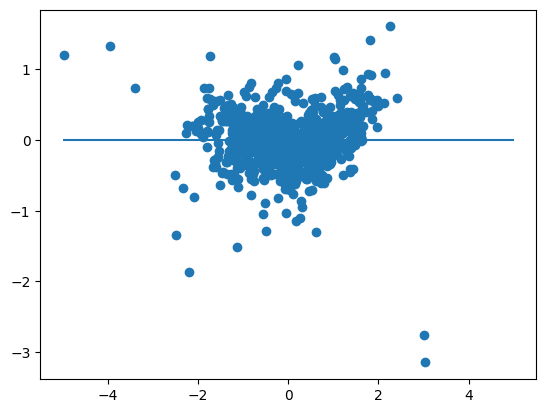

In [ ]:
plt.scatter(model.fittedvalues, model.resid)
plt.hlines(y=0, xmin=-5, xmax=5)

(array([  1.,   1.,   0.,   0.,   0.,   1.,   1.,   3.,   4.,   6.,  28.,
         95., 252., 294., 161.,  57.,  18.,   5.,   5.,   2.]),
 array([-3.14603404, -2.90843143, -2.67082882, -2.43322622, -2.19562361,
        -1.958021  , -1.7204184 , -1.48281579, -1.24521318, -1.00761057,
        -0.77000797, -0.53240536, -0.29480275, -0.05720015,  0.18040246,
         0.41800507,  0.65560767,  0.89321028,  1.13081289,  1.3684155 ,
         1.6060181 ]),
 <BarContainer object of 20 artists>)

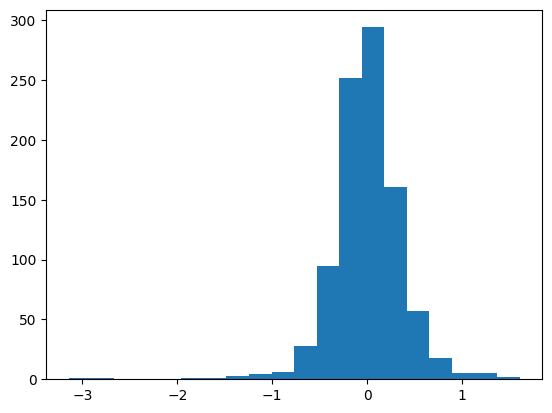

In [ ]:
plt.hist(model.resid, bins=20)

Del valor de kurtosis de la regresión, observamos también que la mayoría de residuos se encuentran en torno al valor de 0, y que hay algunos outliers dentro de los -3. Para esto, vamos a intentar crear variables categóricas que encapsulen los outliers vistos anteriormente, aquellos de las variables "EnclosedPorch", "3SsnPorch", "ScreenPorch" y "PoolArea".

In [ ]:
def add_outlier_feature(x_train, feature, threshold):
  x_train[feature + "Out"] = x_train[feature] > threshold
  x_train[feature + "Out"] = x_train[feature + "Out"].astype(int)

In [ ]:
add_outlier_feature(x_train_scaled, "EnclosedPorch", 1.9)
add_outlier_feature(x_train_scaled, "3SsnPorch", 7)
add_outlier_feature(x_train_scaled, "ScreenPorch", 2)
add_outlier_feature(x_train_scaled, "PoolArea", 10)

add_outlier_feature(x_test_scaled, "EnclosedPorch", 1.9)
add_outlier_feature(x_test_scaled, "3SsnPorch", 7)
add_outlier_feature(x_test_scaled, "ScreenPorch", 2)
add_outlier_feature(x_test_scaled, "PoolArea", 10)

add_outlier_feature(x_val_scaled, "EnclosedPorch", 1.9)
add_outlier_feature(x_val_scaled, "3SsnPorch", 7)
add_outlier_feature(x_val_scaled, "ScreenPorch", 2)
add_outlier_feature(x_val_scaled, "PoolArea", 10)

columns_dropped.add("EnclosedPorch")
columns_dropped.add("3SsnPorch")
columns_dropped.add("ScreenPorch")
columns_dropped.add("PoolArea")

In [ ]:
model = ols(x_train_scaled.drop(columns=list(columns_dropped)), y_train_scaled)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.862
Model:                            OLS   Adj. R-squared (uncentered):              0.859
Method:                 Least Squares   F-statistic:                              284.5
Date:                Sat, 16 Sep 2023   Prob (F-statistic):                        0.00
Time:                        06:36:47   Log-Likelihood:                         -401.20
No. Observations:                 934   AIC:                                      842.4
Df Residuals:                     914   BIC:                                      939.2
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
LotArea              0.1203      0.015      8.172      0.000       0.091       0.149
OverallQual          0.2558      0.020     12.882      0.000       0.217       0.295
OverallCond          0.1036      0.015      6.808      0.000       0.074       0.133
YearBuilt            0.2263      0.022     10.383      0.000       0.184       0.269
YearRemodAdd         0.0966      0.017      5.553      0.000       0.062       0.131
BsmtFinSF1           0.0747      0.016      4.726      0.000       0.044       0.106
BsmtFinSF2          -0.0288      0.013     -2.218      0.027      -0.054      -0.003
2ndFlrSF            -0.0914      0.017     -5.397      0.000      -0.125      -0.058
GrLivArea            0.4257      0.024     18.078      0.000       0.380       0.472
BsmtFullBath         0.0640      0.016      4.102      0.000       0.033       0.095
BedroomAbvGr        -0.0301      0.013     -2.292      0.022      -0.056      -0.004
KitchenAbvGr        -0.0283      0.013     -2.210      0.027      -0.053      -0.003
Fireplaces           0.0783      0.015      5.264      0.000       0.049       0.108
GarageYrBlt         -0.6664      0.156     -4.274      0.000      -0.972      -0.360
GarageCars           0.4950      0.156      3.164      0.002       0.188       0.802
GarageArea           0.2458      0.237      1.038      0.299      -0.219       0.710
EnclosedPorchOut     0.0513      0.038      1.349      0.178      -0.023       0.126
3SsnPorchOut         0.0816      0.098      0.833      0.405      -0.111       0.274
ScreenPorchOut       0.0963      0.044      2.195      0.028       0.010       0.182
PoolAreaOut         -0.3578      0.158     -2.269      0.023      -0.667      -0.048
==============================================================================
Omnibus:                      296.865   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4183.481
Skew:                          -1.045   Prob(JB):                         0.00
Kurtosis:                      13.155   Cond. No.                         46.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

En este caso no vemos absolutamente ninguna mejoría en el modelo. Por lo tanto vamos a descartar estas variables.

In [ ]:
columns_dropped.add("EnclosedPorchOut")
columns_dropped.add("3SsnPorchOut")
columns_dropped.add("ScreenPorchOut")
columns_dropped.add("PoolAreaOut")

Para los outliers de la variable de salida, probaremos eliminar estos registros para ver el resultado.

In [ ]:
print(len(y_train_scaled[y_train_scaled < -2.5].index))
print(len(y_train_scaled[y_train_scaled > 2.5].index))

9
8


Como solo son unos cuantos podemos intentar la eliminación y ver el resultado con el modelo que hemos encontrado mejor hasta el momento.

In [ ]:
matched_index = y_train_scaled[y_train_scaled < -2.5].index
x_train_scaled_1 = x_train_scaled.drop(index=matched_index)
y_train_scaled_1 = y_train_scaled.drop(index=matched_index)
matched_index = y_train_scaled_1[y_train_scaled_1 > 2.5].index
x_train_scaled_1 = x_train_scaled_1.drop(index=matched_index)
y_train_scaled_1 = y_train_scaled_1.drop(index=matched_index)

In [ ]:
model = ols(x_train_scaled_1.drop(columns=list(columns_dropped)),
            y_train_scaled_1)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.858
Model:                            OLS   Adj. R-squared (uncentered):              0.855
Method:                 Least Squares   F-statistic:                              340.1
Date:                Sat, 16 Sep 2023   Prob (F-statistic):                        0.00
Time:                        06:36:47   Log-Likelihood:                         -325.12
No. Observations:                 917   AIC:                                      682.2
Df Residuals:                     901   BIC:                                      759.4
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
LotArea          0.1152      0.014      8.416      0.000       0.088       0.142
OverallQual      0.2825      0.019     14.489      0.000       0.244       0.321
OverallCond      0.1137      0.015      7.777      0.000       0.085       0.142
YearBuilt        0.2171      0.019     11.407      0.000       0.180       0.254
YearRemodAdd     0.0829      0.016      5.107      0.000       0.051       0.115
BsmtFinSF1       0.0741      0.015      5.049      0.000       0.045       0.103
BsmtFinSF2      -0.0296      0.012     -2.462      0.014      -0.053      -0.006
2ndFlrSF        -0.0920      0.016     -5.808      0.000      -0.123      -0.061
GrLivArea        0.4004      0.022     18.158      0.000       0.357       0.444
BsmtFullBath     0.0587      0.014      4.056      0.000       0.030       0.087
BedroomAbvGr    -0.0247      0.012     -2.022      0.043      -0.049      -0.001
KitchenAbvGr    -0.0216      0.012     -1.817      0.070      -0.045       0.002
Fireplaces       0.0783      0.014      5.684      0.000       0.051       0.105
GarageYrBlt     -0.6353      0.146     -4.359      0.000      -0.921      -0.349
GarageCars       0.4622      0.145      3.185      0.001       0.177       0.747
GarageArea       0.2330      0.220      1.061      0.289      -0.198       0.664
==============================================================================
Omnibus:                      395.336   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7733.686
Skew:                          -1.472   Prob(JB):                         0.00
Kurtosis:                      16.919   Cond. No.                         42.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

De igual manera, no hemos encontrado ninguna mejoría en el modelo. Por lo tanto lo vamos a descartar.

In [ ]:
# chosen_model_result = first_model_result

In [ ]:
# test_numerical_features = numerical_features[:-1]
# kaggle_test_numerical = kaggle_test[test_numerical_features]

# kaggle_test_numerical_log = pd.DataFrame()
# for feature in test_numerical_features:
#   kaggle_test_numerical_log[feature] = kaggle_test_numerical[feature].apply(
#       lambda x: log(x + 0.0001))

# kaggle_test_numerical_transf = pd.DataFrame()
# for feature in test_numerical_features:
#   kaggle_test_numerical_transf[feature] = kaggle_test_numerical_log[feature].apply(
#       lambda x: (x - kaggle_test_numerical_log[feature].mean()) / kaggle_test_numerical_log[feature].std())

# kaggle_test_numerical_transf_c = sm.add_constant(kaggle_test_numerical_transf)
# kaggle_test_numerical_transf_c = kaggle_test_numerical_transf_c.drop(
#     columns=["LotFrontage", "MasVnrArea", "BsmtUnfSF",
#              "1stFlrSF", "LowQualFinSF", "BsmtHalfBath",
#              "FullBath", "HalfBath", "TotRmsAbvGrd",
#              "OpenPorchSF", "EnclosedPorch", "3SsnPorch",
#              "MiscVal", "MoSold", "YrSold", "WoodDeckSF"])

In [ ]:
# from math import exp

# predictions_df = pd.DataFrame()
# predictions = []
# for index, row in kaggle_test_numerical_transf_c.iterrows():
#   predictions.append(first_model_result.predict(row))
# predictions_df["Id"] = kaggle_test["Id"]
# predictions_df["SalePrice"] = np.array(predictions)

# predictions_df["SalePrice"] = predictions_df["SalePrice"].apply(
#     lambda x : x * housing_log["SalePrice"].std() + housing_log["SalePrice"].mean())

# predictions_df["SalePrice"] = predictions_df["SalePrice"].apply(
#     lambda x : exp(x - 0.0001))

# print(predictions_df.head())
# predictions_df.to_csv("results.csv", index=False)

### Modelo lineal integrando variables dummies

Ahora procederemos a integrar las variables categóricas al modelo utilizando one-hot encoding.

#### MSSubClass

In [ ]:

housing_dummy = pd.get_dummies(housing["MSSubClass"], prefix="MSSubClass",
                               columns=["MSSubClass"])

numerical_features = housing.select_dtypes(include="number").columns

housing_log = pd.DataFrame()
for feature in numerical_features:
  housing_log[feature] = housing[feature].apply(
      lambda x: log(x + 0.0001))

housing_transf = pd.DataFrame()
for feature in numerical_features:
  housing_dummy[feature] = housing_log[feature].apply(
      lambda x: (x - housing_log[feature].mean()) / housing_log[feature].std())

housing_dummy = housing_dummy.drop(columns=[
    "Id", "LotFrontage", "MasVnrArea", "BsmtUnfSF",
    "1stFlrSF", "LowQualFinSF", "BsmtHalfBath",
    "FullBath", "HalfBath", "TotRmsAbvGrd",
    "OpenPorchSF", "EnclosedPorch", "3SsnPorch",
    "MiscVal", "MoSold", "YrSold",
    "WoodDeckSF"])

housing_dummy.head()

,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,GarageArea,ScreenPorch,PoolArea,SalePrice
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-0.133185,0.684152,-0.44036,1.044819,0.877240,0.729644,-0.358651,0.092184,1.160980,0.529078,1.185716,0.174587,-0.091814,-1.055155,0.245494,0.296488,0.286004,-0.29355,-0.069383,0.559876
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.113403,0.045469,1.88385,0.163392,-0.424038,0.774690,-0.358651,0.243717,-0.871735,-0.381715,-0.839603,0.174587,-0.091814,0.921779,0.241966,0.296488,0.236498,-0.29355,-0.069383,0.212692
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.419917,0.684152,-0.44036,0.979937,0.829358,0.678031,-0.358651,0.120331,1.162757,0.659449,1.185716,0.174587,-0.091814,0.921779,0.245234,0.296488,0.315389,-0.29355,-0.069383,0.733795
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.103311,0.684152,-0.44036,-1.873153,-0.715624,0.565943,-0.358651,0.043690,1.145456,0.541326,1.185716,0.174587,-0.091814,0.921779,0.244844,0.475379,0.330778,-0.29355,-0.069383,-0.437232
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.878108,1.237405,-0.44036,0.947472,0.733522,0.719280,-0.358651,0.205737,1.187658,1.281751,1.185716,0.572895,-0.091814,0.921779,0.245104,0.475379,0.405452,-0.29355,-0.069383,1.014303


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(housing_dummy.drop(columns=["SalePrice"]),
                                                    housing_dummy["SalePrice"],
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
x_train_c = sm.add_constant(x_train)
first_model = sm.OLS(y_train, x_train)
first_model_result = first_model.fit()
first_model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     234.7
Date:                Sat, 16 Sep 2023   Prob (F-statistic):               0.00
Time:                        06:37:00   Log-Likelihood:                -428.89
No. Observations:                1168   AIC:                             925.8
Df Residuals:                    1134   BIC:                             1098.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
MSSubClass_120     0.0089      0.060      0.148      0.883      -0.109       0.127
MSSubClass_160    -0.1991      0.075     -2.668      0.008      -0.345      -0.053
MSSubClass_180    -0.1256      0.143     -0.880      0.379      -0.405       0.154
MSSubClass_190    -0.0360      0.077     -0.470      0.639      -0.186       0.114
MSSubClass_20      0.0324      0.034      0.947      0.344      -0.035       0.100
MSSubClass_30      0.1216      0.068      1.794      0.073      -0.011       0.254
MSSubClass_40      0.0202      0.215      0.094      0.925      -0.401       0.441
MSSubClass_45      0.1998      0.122      1.643      0.101      -0.039       0.438
MSSubClass_50      0.0634      0.053      1.206      0.228      -0.040       0.167
MSSubClass_60     -0.0979      0.049     -2.003      0.045      -0.194      -0.002
MSSubClass_70      0.2369      0.072      3.280      0.001       0.095       0.379
MSSubClass_75      0.2056      0.109      1.895      0.058      -0.007       0.419
MSSubClass_80     -0.0972      0.055     -1.780      0.075      -0.204       0.010
MSSubClass_85      0.0085      0.091      0.094      0.925      -0.170       0.187
MSSubClass_90     -0.2192      0.063     -3.463      0.001      -0.343      -0.095
LotArea            0.1085      0.016      6.686      0.000       0.077       0.140
OverallQual        0.2114      0.018     11.522      0.000       0.175       0.247
OverallCond        0.1136      0.013      8.759      0.000       0.088       0.139
YearBuilt          0.2974      0.026     11.647      0.000       0.247       0.348
YearRemodAdd       0.0721      0.015      4.695      0.000       0.042       0.102
BsmtFinSF1         0.0592      0.014      4.352      0.000       0.032       0.086
BsmtFinSF2        -0.0196      0.011     -1.748      0.081      -0.042       0.002
TotalBsmtSF        0.0200      0.012      1.651      0.099      -0.004       0.044
2ndFlrSF          -0.0508      0.036     -1.428      0.154      -0.121       0.019
GrLivArea          0.4420      0.022     20.511      0.000       0.400       0.484
BsmtFullBath       0.0688      0.013      5.206      0.000       0.043       0.095
BedroomAbvGr      -0.0351      0.013     -2.784      0.005      -0.060      -0.010
KitchenAbvGr      -0.0173      0.010     -1.694      0.090      -0.037       0.003
Fireplaces         0.0592      0.013      4.604      0.000       0.034       0.084
GarageYrBlt       -0.6899      0.134     -5.133      0.000      -0.954      -0.426
GarageCars         0.4470      0.139      3.223      0.001       0.175       0.719
GarageArea         0.3110      0.205      1.519      0.129      -0.091       0.713
ScreenPorch        0.0294      0.011      2.785      0.005       0.009       0.050
PoolArea          -0.0231      0.010     -2.239      0.025      -0.043      -0.003
============

Procedemos a eliminar aquellos que no son estadísticamente significativos.

In [ ]:
x_train_sec = x_train.drop(columns=[
    "MSSubClass_120", "MSSubClass_180", "MSSubClass_190", "MSSubClass_20",
    "MSSubClass_30", "MSSubClass_40", "MSSubClass_45", "MSSubClass_50",
    "MSSubClass_75", "MSSubClass_80", "MSSubClass_85", "BsmtFinSF2",
    "TotalBsmtSF", "2ndFlrSF", "KitchenAbvGr"])
x_train_c = sm.add_constant(x_train_sec)
dummy_model = sm.OLS(y_train, x_train_c)
dummy_model_result = dummy_model.fit()
dummy_model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     399.2
Date:                Sat, 16 Sep 2023   Prob (F-statistic):               0.00
Time:                        06:37:00   Log-Likelihood:                -445.73
No. Observations:                1168   AIC:                             931.5
Df Residuals:                    1148   BIC:                             1033.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0514      0.014      3.750      0.000       0.025       0.078
MSSubClass_160    -0.2957      0.064     -4.611      0.000      -0.421      -0.170
MSSubClass_60     -0.1874      0.033     -5.658      0.000      -0.252      -0.122
MSSubClass_70      0.1441      0.059      2.463      0.014       0.029       0.259
MSSubClass_90     -0.2709      0.062     -4.394      0.000      -0.392      -0.150
LotArea            0.1156      0.014      8.149      0.000       0.088       0.143
OverallQual        0.2363      0.017     13.578      0.000       0.202       0.270
OverallCond        0.1017      0.013      8.055      0.000       0.077       0.126
YearBuilt          0.2838      0.020     14.425      0.000       0.245       0.322
YearRemodAdd       0.0800      0.015      5.260      0.000       0.050       0.110
BsmtFinSF1         0.0669      0.013      5.112      0.000       0.041       0.093
GrLivArea          0.4058      0.019     21.899      0.000       0.369       0.442
BsmtFullBath       0.0622      0.013      4.750      0.000       0.037       0.088
BedroomAbvGr      -0.0338      0.012     -2.838      0.005      -0.057      -0.010
Fireplaces         0.0611      0.013      4.777      0.000       0.036       0.086
GarageYrBlt       -0.7402      0.132     -5.596      0.000      -1.000      -0.481
GarageCars         0.4546      0.138      3.293      0.001       0.184       0.725
GarageArea         0.3527      0.203      1.735      0.083      -0.046       0.752
ScreenPorch        0.0296      0.011      2.799      0.005       0.009       0.050
PoolArea          -0.0239      0.010     -2.319      0.021      -0.044      -0.004
==============================================================================
Omnibus:                      374.669   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4633.051
Skew:                          -1.117   Prob(JB):                         0.00
Kurtosis:                      12.498   Cond. No.                         47.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

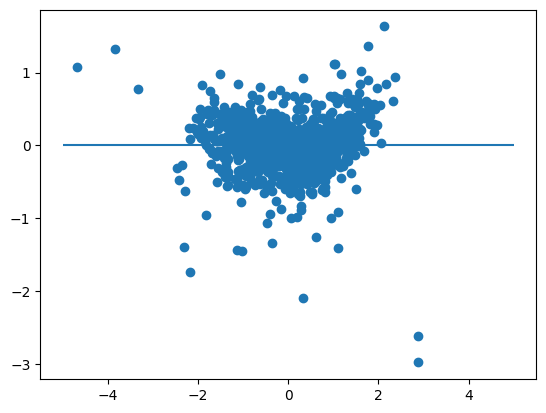

In [ ]:
plt.scatter(dummy_model_result.fittedvalues, dummy_model_result.resid)
plt.hlines(y=0, xmin=-5, xmax=5)

(array([  1.,   1.,   0.,   1.,   0.,   1.,   4.,   2.,   7.,   6.,  58.,
        163., 365., 346., 138.,  52.,  13.,   7.,   2.,   1.]),
 array([-2.98322376, -2.75236532, -2.52150689, -2.29064846, -2.05979003,
        -1.8289316 , -1.59807316, -1.36721473, -1.1363563 , -0.90549787,
        -0.67463944, -0.44378101, -0.21292257,  0.01793586,  0.24879429,
         0.47965272,  0.71051115,  0.94136959,  1.17222802,  1.40308645,
         1.63394488]),
 <BarContainer object of 20 artists>)

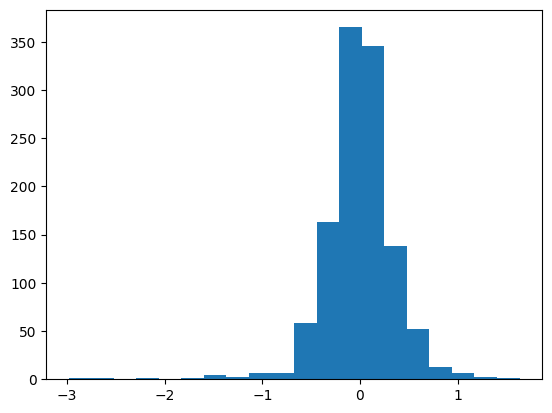

In [ ]:
plt.hist(dummy_model_result.resid, bins=20)

In [ ]:
housing_dummy = housing_dummy.drop(columns=[
    "MSSubClass_120", "MSSubClass_180", "MSSubClass_190", "MSSubClass_20",
    "MSSubClass_30", "MSSubClass_40", "MSSubClass_45", "MSSubClass_50",
    "MSSubClass_75", "MSSubClass_80", "MSSubClass_85", "BsmtFinSF2",
    "TotalBsmtSF", "2ndFlrSF", "KitchenAbvGr"])

#### MSZoning

In [ ]:
mszoning = pd.get_dummies(housing["MSZoning"], prefix="MSZoning",
                               columns=["MSZoning"])
housing_dummy = pd.concat([housing_dummy, mszoning], axis=1)
housing_dummy.head()

,MSSubClass_160,MSSubClass_60,MSSubClass_70,MSSubClass_90,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,GrLivArea,BsmtFullBath,BedroomAbvGr,Fireplaces,GarageYrBlt,GarageCars,GarageArea,ScreenPorch,PoolArea,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0,1,0,0,-0.133185,0.684152,-0.44036,1.044819,0.877240,0.729644,0.529078,1.185716,0.174587,-1.055155,0.245494,0.296488,0.286004,-0.29355,-0.069383,0.559876,0,0,0,1,0
1,0,0,0,0,0.113403,0.045469,1.88385,0.163392,-0.424038,0.774690,-0.381715,-0.839603,0.174587,0.921779,0.241966,0.296488,0.236498,-0.29355,-0.069383,0.212692,0,0,0,1,0
2,0,1,0,0,0.419917,0.684152,-0.44036,0.979937,0.829358,0.678031,0.659449,1.185716,0.174587,0.921779,0.245234,0.296488,0.315389,-0.29355,-0.069383,0.733795,0,0,0,1,0
3,0,0,1,0,0.103311,0.684152,-0.44036,-1.873153,-0.715624,0.565943,0.541326,1.185716,0.174587,0.921779,0.244844,0.475379,0.330778,-0.29355,-0.069383,-0.437232,0,0,0,1,0
4,0,1,0,0,0.878108,1.237405,-0.44036,0.947472,0.733522,0.719280,1.281751,1.185716,0.572895,0.921779,0.245104,0.475379,0.405452,-0.29355,-0.069383,1.014303,0,0,0,1,0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(housing_dummy.drop(columns=["SalePrice"]),
                                                    housing_dummy["SalePrice"],
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
x_train_c = sm.add_constant(x_train)
dummy_model = sm.OLS(y_train, x_train)
dummy_model_result = dummy_model.fit()
dummy_model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     337.5
Date:                Sat, 16 Sep 2023   Prob (F-statistic):               0.00
Time:                        06:37:01   Log-Likelihood:                -432.22
No. Observations:                1168   AIC:                             912.4
Df Residuals:                    1144   BIC:                             1034.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
MSSubClass_160      -0.3378      0.065     -5.166      0.000      -0.466      -0.209
MSSubClass_60       -0.1939      0.033     -5.890      0.000      -0.258      -0.129
MSSubClass_70        0.1260      0.058      2.167      0.030       0.012       0.240
MSSubClass_90       -0.2766      0.061     -4.521      0.000      -0.397      -0.157
LotArea              0.1038      0.015      6.905      0.000       0.074       0.133
OverallQual          0.2350      0.017     13.541      0.000       0.201       0.269
OverallCond          0.0988      0.013      7.841      0.000       0.074       0.124
YearBuilt            0.2571      0.021     12.279      0.000       0.216       0.298
YearRemodAdd         0.0812      0.015      5.344      0.000       0.051       0.111
BsmtFinSF1           0.0680      0.013      5.205      0.000       0.042       0.094
GrLivArea            0.4104      0.018     22.272      0.000       0.374       0.447
BsmtFullBath         0.0620      0.013      4.762      0.000       0.036       0.088
BedroomAbvGr        -0.0352      0.012     -2.980      0.003      -0.058      -0.012
Fireplaces           0.0620      0.013      4.835      0.000       0.037       0.087
GarageYrBlt         -0.7421      0.132     -5.641      0.000      -1.000      -0.484
GarageCars           0.4917      0.137      3.579      0.000       0.222       0.761
GarageArea           0.3154      0.203      1.557      0.120      -0.082       0.713
ScreenPorch          0.0306      0.010      2.916      0.004       0.010       0.051
PoolArea            -0.0237      0.010     -2.321      0.020      -0.044      -0.004
MSZoning_C (all)    -0.5508      0.182     -3.033      0.002      -0.907      -0.195
MSZoning_FV          0.2271      0.055      4.114      0.000       0.119       0.335
MSZoning_RH          0.0377      0.094      0.400      0.689      -0.147       0.223
MSZoning_RL          0.0637      0.015      4.269      0.000       0.034       0.093
MSZoning_RM         -0.0264      0.034     -0.777      0.437      -0.093       0.040
==============================================================================
Omnibus:                      348.628   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4301.151
Skew:                          -1.014   Prob(JB):                         0.00
Kurtosis:                      12.180   Cond. No.                         47.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x_train_sec = x_train.drop(columns=[
    "MSZoning_RH", "MSZoning_RM"])
x_train_c = sm.add_constant(x_train_sec)
dummy_model = sm.OLS(y_train, x_train_c)
dummy_model_result = dummy_model.fit()
dummy_model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     353.0
Date:                Sat, 16 Sep 2023   Prob (F-statistic):               0.00
Time:                        06:37:01   Log-Likelihood:                -432.44
No. Observations:                1168   AIC:                             910.9
Df Residuals:                    1145   BIC:                             1027.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0205      0.033     -0.626      0.531      -0.085       0.044
MSSubClass_160      -0.3405      0.065     -5.221      0.000      -0.469      -0.213
MSSubClass_60       -0.1945      0.033     -5.915      0.000      -0.259      -0.130
MSSubClass_70        0.1285      0.058      2.214      0.027       0.015       0.242
MSSubClass_90       -0.2743      0.061     -4.491      0.000      -0.394      -0.154
LotArea              0.1041      0.015      6.926      0.000       0.075       0.134
OverallQual          0.2346      0.017     13.529      0.000       0.201       0.269
OverallCond          0.0988      0.013      7.840      0.000       0.074       0.124
YearBuilt            0.2582      0.021     12.380      0.000       0.217       0.299
YearRemodAdd         0.0808      0.015      5.321      0.000       0.051       0.111
BsmtFinSF1           0.0685      0.013      5.251      0.000       0.043       0.094
GrLivArea            0.4112      0.018     22.370      0.000       0.375       0.447
BsmtFullBath         0.0617      0.013      4.744      0.000       0.036       0.087
BedroomAbvGr        -0.0351      0.012     -2.967      0.003      -0.058      -0.012
Fireplaces           0.0616      0.013      4.810      0.000       0.036       0.087
GarageYrBlt         -0.7428      0.132     -5.648      0.000      -1.001      -0.485
GarageCars           0.4868      0.137      3.550      0.000       0.218       0.756
GarageArea           0.3202      0.202      1.583      0.114      -0.077       0.717
ScreenPorch          0.0305      0.010      2.909      0.004       0.010       0.051
PoolArea            -0.0238      0.010     -2.327      0.020      -0.044      -0.004
MSZoning_C (all)    -0.5311      0.183     -2.909      0.004      -0.889      -0.173
MSZoning_FV          0.2484      0.062      4.005      0.000       0.127       0.370
MSZoning_RL          0.0841      0.036      2.351      0.019       0.014       0.154
==============================================================================
Omnibus:                      350.156   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4323.370
Skew:                          -1.020   Prob(JB):                         0.00
Kurtosis:                      12.202   Cond. No.                         47.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Entrenamiento del modelo

Realizaremos una comparativa entre el modelo lineal que envuelve a las variables estadísticamente significativas sin utilizar ningún método de regularización.

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
model = LinearRegression()
model.fit(x_train_scaled.drop(columns=list(columns_dropped)), y_train_scaled)
y_pred = model.predict(x_val_scaled.drop(columns=list(columns_dropped)))

In [ ]:
mse = mean_squared_error(y_val_scaled, y_pred)
print(mse)
print(r2_score(y_val_scaled, y_pred))

0.12002139413190367
0.8794634925885603


### Regularización

Ahora compararemos el modelo con las versiones que sí utilizan regularización.

#### Ridge

In [ ]:
alphas = np.arange(0.0001, 100.0, 0.1)

best_alpha = None
best_score = float('-inf')

scores = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train_scaled.drop(columns=columns_dropped), y_train_scaled)

    score = ridge.score(x_val_scaled.drop(columns=columns_dropped),
                        y_val_scaled)
    scores.append(score)

    if score > best_score:
        best_score = score
        best_alpha = alpha

best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(x_train_scaled.drop(columns=columns_dropped), y_train_scaled)

Ridge(alpha=4.0001)

Text(0, 0.5, 'R Squared')

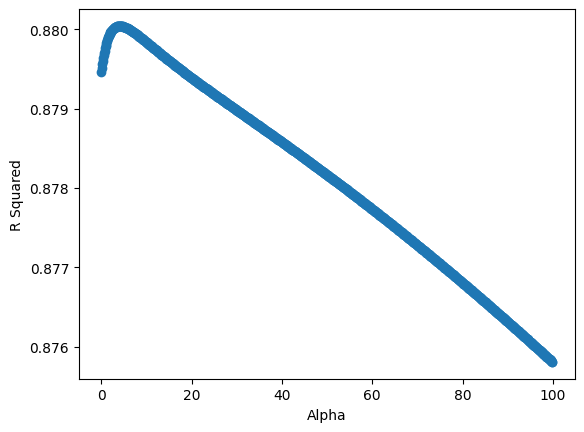

In [ ]:
plt.scatter(alphas, scores)
plt.xlabel("Alpha")
plt.ylabel("R Squared")

Comprobamos que el mejor valor de alpha para Ridge es 2.4, con un coeficiente de determinación de casi 0.8808.

In [ ]:
y_pred = best_ridge.predict(x_val_scaled.drop(columns=list(columns_dropped)))

In [ ]:
mse = mean_squared_error(y_val_scaled, y_pred)
print(mse)
print(r2_score(y_val_scaled, y_pred))

0.11944355929618257
0.8800438074021171


#### Lasso

In [ ]:
alphas = np.arange(0.001, 1, 0.1)

best_alpha = None
best_score = float('-inf')

scores = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train_scaled.drop(columns=columns_dropped), y_train_scaled)

    score = lasso.score(x_val_scaled.drop(columns=columns_dropped),
                        y_val_scaled)
    scores.append(score)

    if score > best_score:
        best_score = score
        best_alpha = alpha

best_lasso = Lasso(alpha=best_alpha)
best_lasso.fit(x_train_scaled.drop(columns=columns_dropped), y_train_scaled)

Lasso(alpha=0.001)

Text(0, 0.5, 'R Squared')

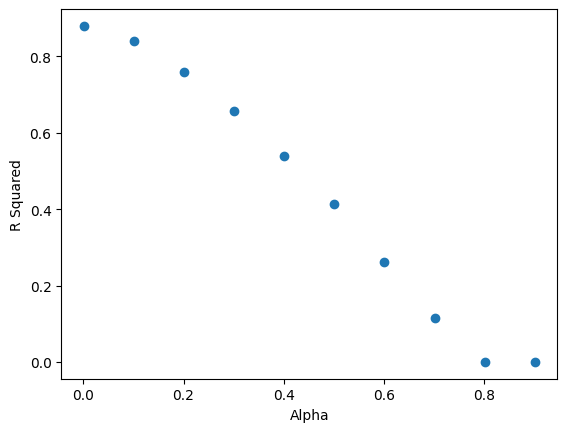

In [ ]:
plt.scatter(alphas, scores)
plt.xlabel("Alpha")
plt.ylabel("R Squared")

In [ ]:
y_pred = best_lasso.predict(x_val_scaled.drop(columns=list(columns_dropped)))

In [ ]:
mse = mean_squared_error(y_val_scaled, y_pred)
print(mse)
print(r2_score(y_val_scaled, y_pred))

0.11945254561127303
0.8800347825191507


#### ElasticNet

In [ ]:
alphas = np.arange(0.001, 2, 0.1)

best_alpha = None
best_score = float('-inf')

scores = []

for alpha in alphas:
    elastic = ElasticNet(alpha=alpha)
    elastic.fit(x_train_scaled.drop(columns=columns_dropped), y_train_scaled)

    score = elastic.score(x_val_scaled.drop(columns=columns_dropped),
                          y_val_scaled)
    scores.append(score)

    if score > best_score:
        best_score = score
        best_alpha = alpha

best_elastic = ElasticNet(alpha=best_alpha)
best_elastic.fit(x_train_scaled.drop(columns=columns_dropped), y_train_scaled)

ElasticNet(alpha=0.001)

Text(0, 0.5, 'R Squared')

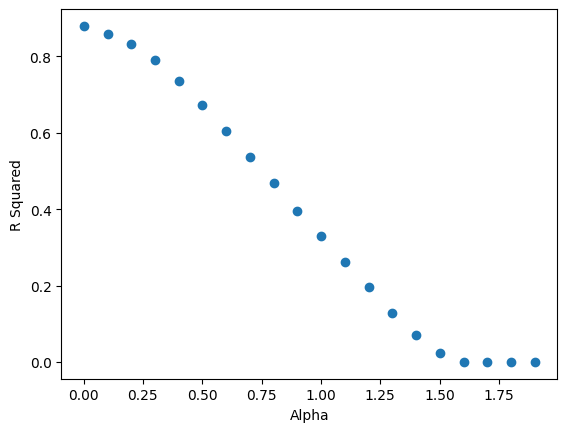

In [ ]:
plt.scatter(alphas, scores)
plt.xlabel("Alpha")
plt.ylabel("R Squared")

In [ ]:
y_pred = best_elastic.predict(x_val_scaled.drop(columns=list(columns_dropped)))

In [ ]:
mse = mean_squared_error(y_val_scaled, y_pred)
print(mse)
print(r2_score(y_val_scaled, y_pred))

0.11956152969773241
0.8799253306898309


De todos los modelos el que tiene mayor coeficiente de determinación es el de lasso. Por lo tanto es el elegido. Lo probamos con el dataset de testing.

In [ ]:
y_pred = best_lasso.predict(x_test_scaled.drop(columns=list(columns_dropped)))

In [ ]:
mse = mean_squared_error(y_test_scaled, y_pred)
print(mse)
print(r2_score(y_test_scaled, y_pred))

0.12229127667842483
0.8772884783845359


Como era de esperarse, en el dataset de testing, el valor de MSE es mayor y el del coeficiente de determinación menor. Sin embargo, es bastante parecido al que habíamos calculado con el de validación anteriormente. Por lo tanto, es un buen modelo.

El modelo resultante tiene un menor error que el requerido por la profesora Elisabetta Crescio.

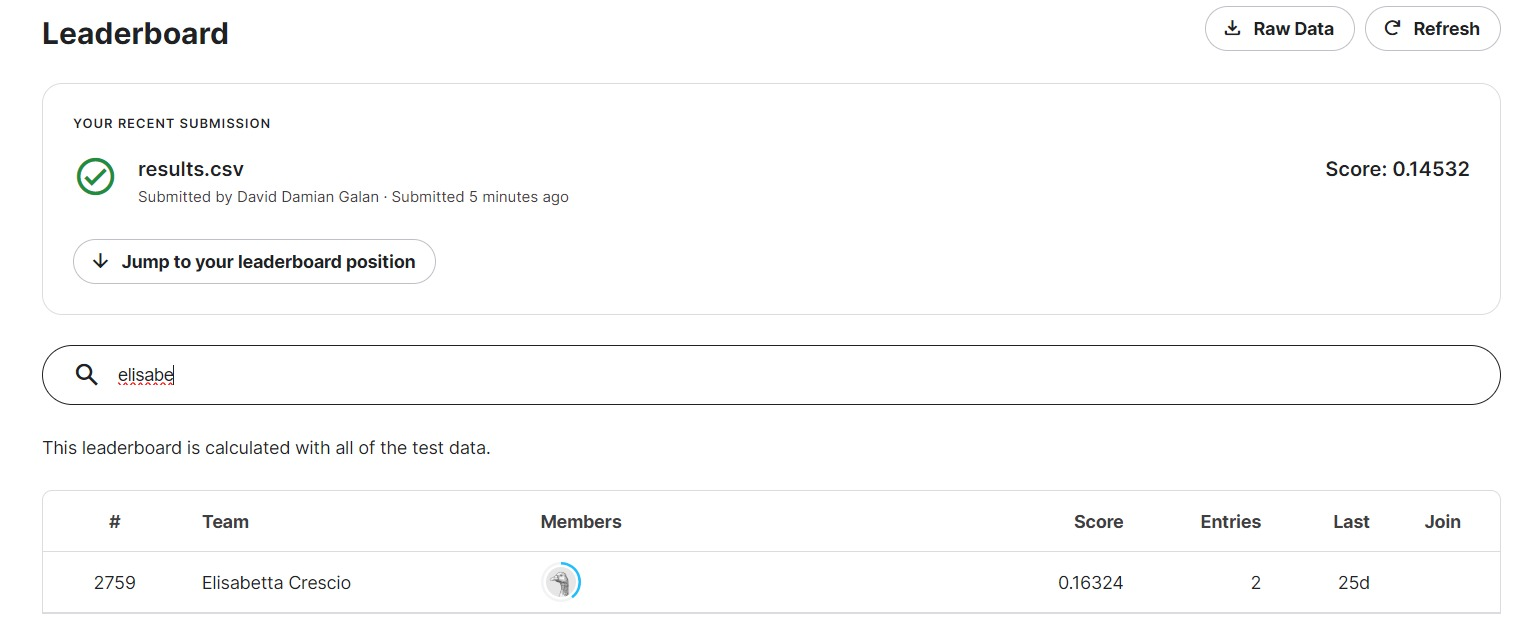

Podemos también comprobar la congruencia del modelo utilizando una matriz de correlación.

In [ ]:
data = pd.concat([x_train_scaled.drop(columns=columns_dropped),
                  y_train_scaled], axis=1)
correlation_to_y = data.corr()["SalePrice"]
correlation_to_y

LotArea         0.393040
OverallQual     0.776117
OverallCond    -0.014271
YearBuilt       0.572726
YearRemodAdd    0.542726
BsmtFinSF1      0.163899
BsmtFinSF2     -0.001948
2ndFlrSF        0.124024
GrLivArea       0.709210
BsmtFullBath    0.242659
BedroomAbvGr    0.088161
KitchenAbvGr   -0.050129
Fireplaces      0.518853
GarageYrBlt     0.345987
GarageCars      0.429674
GarageArea      0.398533
SalePrice       1.000000
Name: SalePrice, dtype: float64

Verificando, los coeficientes obtenidos son los siguientes.

In [ ]:
x_train_scaled.drop(columns=columns_dropped).columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'BsmtFinSF2', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')

In [ ]:
best_lasso.coef_

array([ 0.12282533,  0.26214434,  0.09957013,  0.21900762,  0.09933626,
        0.07417914, -0.02785246, -0.0950812 ,  0.42947845,  0.06473182,
       -0.02977341, -0.02614604,  0.08128474, -0.41403312,  0.48597954,
        0.        ])

Observamos que en la mayoría de variables, los signos de los coeficientes son congruentes con los signos de la correlación. Sin embargo, hay algunos otros, como BedroomAbvGr, que tienen el signo contrario. Eso podría deberse a la baja correlación que tienen, y por lo tanto el modelo todavía podría mejorarse más.

### Exportar el modelo final

Guardaremos el modelo final para poder utilizarlo en un API.

In [ ]:
from joblib import dump
import pathlib
dump(best_lasso, pathlib.Path("house-pricing.joblib"))

['house-pricing.joblib']

In [ ]:
x_test_scaled.drop(columns=list(columns_dropped))

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,2ndFlrSF,GrLivArea,BsmtFullBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,GarageArea
892,-0.053073,0.112806,1.922554,-0.327731,0.897273,0.727599,-0.373758,-0.833512,-0.736671,-0.839652,0.212816,-0.206665,-1.018213,0.246309,0.018733,0.098663
1105,0.672835,1.260000,-0.408285,0.761853,0.507411,0.788684,-0.373758,1.246324,1.835230,1.182842,0.212816,-0.206665,1.102113,0.250285,0.318198,0.373117
413,0.068272,-0.614238,0.495881,-1.614859,-1.715114,-1.440801,-0.373758,-0.833512,-0.845980,-0.839652,-0.234858,-0.206665,0.953722,0.241611,0.318198,0.184462
522,-1.057557,0.112806,1.260344,-0.896849,-1.715114,0.657494,-0.373758,1.178339,0.533134,-0.839652,0.212816,-0.206665,1.102113,0.244622,0.318198,0.227105
1036,0.771374,1.729687,-0.408285,1.213743,1.140146,0.787339,-0.373758,-0.833512,0.456396,1.182842,-0.234858,-0.206665,0.953722,0.252060,0.493380,0.441600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,-0.729954,-1.504064,1.260344,-1.254927,0.751258,0.538079,-0.373758,-0.833512,-0.572548,-0.839652,-0.234858,-0.206665,-1.018213,0.250412,0.318198,0.357122
1361,1.206285,0.727514,-0.408285,1.144412,0.994495,0.817766,-0.373758,-0.833512,0.292720,1.182842,0.212816,-0.206665,0.953722,0.251681,0.318198,0.233614
802,-0.103031,0.727514,-0.408285,1.144412,0.994495,0.724439,-0.373758,1.190903,0.150760,1.182842,0.212816,-0.206665,0.953722,0.251681,0.318198,0.220439
651,0.094799,-1.504064,-0.408285,-1.147310,-1.715114,-1.440801,-0.373758,1.195568,0.255041,1.182842,0.530449,-0.206665,0.953722,0.243318,0.018733,0.130313


Para implementar la solución y realizar predicciones, necesitamos reescalar los datos a sus valores originales. Para este fin, implementamos una clase que se encargar de realizar la tarea y que podemos exportar a un archivo.

In [ ]:
from math import exp

class DataScaler:
    def __init__(self, df: pd.DataFrame) -> None:
        self.log_const = 0.0001
        self.numerical_features = df.select_dtypes(include="number").columns
        df_scaled = pd.DataFrame()
        for feature in self.numerical_features:
            df_scaled[feature] = df[feature].apply(
                lambda x: log(x + self.log_const)
            )
        self.mean = df_scaled.mean()
        self.std = df_scaled.std()

    def scale(self, df: pd.DataFrame) -> pd.DataFrame:
        numerical_features = df.select_dtypes(include="number").columns
        df_scaled = pd.DataFrame()
        for feature in numerical_features:
            df_scaled[feature] = df[feature].apply(
                lambda x: log(x + self.log_const)
            )
        for feature in numerical_features:
            df_scaled[feature] = df_scaled[feature].apply(
                lambda x: (x - self.mean[feature]) / self.std[feature]
            )
        return df_scaled

    def de_scale(self, df_scaled: pd.DataFrame) -> pd.DataFrame:
        df = pd.DataFrame()
        for feature in self.numerical_features:
            df[feature] = df_scaled[feature].apply(
                lambda x: x * self.std[feature] + self.mean[feature]
            )
        for feature in self.numerical_features:
            df[feature] = df[feature].apply(
                lambda x: exp(x - self.log_const)
            )
        return df


In [ ]:
x_train_scaled

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,EnclosedPorchOut,3SsnPorchOut,ScreenPorchOut,PoolAreaOut
251,0.399728,-1.290777,1.224662,-0.458685,1.145961,1.067460,1.298964,0.836614,-0.345541,-3.442358,0.328501,1.188420,-0.889449,-0.135936,0.348360,1.193585,3.914687,0.474497,-0.766617,-0.555733,-0.067843,-0.994888,0.896292,0.243881,0.292280,0.278016,1.005235,-1.118834,-0.39247,-0.127669,3.286443,-0.080362,-0.199891,1.416335,-0.613047,0,0,1,0
861,0.501701,0.460656,-0.711370,-1.551843,-0.167458,-0.946248,-0.853007,0.750355,-0.345541,0.075819,0.164436,-0.209400,-0.889449,-0.135936,-1.014493,1.193585,-0.254790,-0.485899,1.299659,0.167973,-0.067843,-0.259357,-1.083467,0.238474,0.292280,0.259419,-0.945862,-1.118834,-0.39247,-0.127669,-0.301578,-0.080362,-0.199891,-0.673128,1.638266,0,0,0,0
851,-2.085003,-2.066180,1.224662,-0.458685,1.050771,0.877502,0.951125,-1.446227,-0.345541,0.527369,0.244789,0.845208,-0.889449,-0.135936,0.013733,-0.833144,-0.254790,0.474497,-0.766617,-0.555733,-0.067843,0.362527,0.896292,0.243490,0.292280,0.193581,1.026198,0.704846,-0.39247,-0.127669,-0.301578,-0.080362,-0.199891,-0.248732,-1.364232,0,0,0,0
582,0.516417,0.496682,0.039645,-0.458685,0.636629,0.257511,1.084766,0.746198,-0.345541,-3.442358,0.068859,-0.964489,-0.889449,-0.135936,-1.750694,1.193585,-0.254790,-0.485899,-0.766617,0.167973,-0.067843,-0.994888,-1.083467,-4.158727,-4.107207,-4.137032,-0.945862,0.775067,-0.39247,-0.127669,-0.301578,-0.080362,-0.199891,-0.248732,-0.613047,0,0,0,0
326,0.338835,0.324924,1.224662,-0.458685,0.732440,0.400945,-0.853007,0.840585,-0.345541,-0.089939,0.363614,1.364175,-0.889449,-0.135936,0.519719,1.346099,-0.254790,-0.485899,1.299659,-1.792877,-0.067843,-0.259357,1.045272,0.242179,0.292280,0.241334,1.004099,0.765425,-0.39247,-0.127669,-0.301578,-0.080362,-0.199891,-0.248732,0.137765,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,0.459033,-0.543181,-1.630533,0.434494,-0.005826,-0.704275,-0.853007,0.639091,2.825798,0.132405,0.091471,-0.785848,-0.889449,-0.135936,-1.576521,-0.833144,-0.254790,-0.485899,-0.766617,0.167973,-0.067843,-0.994888,-1.083467,0.241653,0.292280,0.336239,0.970751,-1.118834,-0.39247,-0.127669,-0.301578,-0.080362,4.862224,1.250846,0.888202,0,0,0,0
401,0.474339,-0.091504,0.674620,-0.458685,1.114247,0.972528,-0.853007,0.260406,-0.345541,0.529835,0.256123,0.514963,-0.889449,-0.135936,-0.308251,-0.833144,-0.254790,0.474497,-0.766617,0.167973,-0.067843,-0.259357,0.896292,0.243751,0.292280,0.193581,-0.945862,-1.118834,-0.39247,-0.127669,-0.301578,-0.080362,-0.199891,0.391207,-1.364232,0,0,0,0
957,0.488509,-0.417942,-0.711370,-0.458685,-0.264636,-1.091727,-0.853007,0.653716,-0.345541,0.360503,0.171231,-0.155719,-0.889449,-0.135936,-0.962155,-0.833144,-0.254790,-0.485899,-0.766617,0.167973,-0.067843,-0.259357,-1.083467,0.240069,0.292280,0.297458,-0.945862,-1.118834,-0.39247,-0.127669,-0.301578,-0.080362,-0.199891,-0.673128,-0.613047,0,0,0,0
992,0.514042,0.118465,0.039645,1.843831,-0.199834,0.400945,1.250442,0.688300,2.671561,0.037390,0.071757,-0.267082,1.134252,-0.135936,0.745160,-0.833144,-0.254790,0.474497,1.299659,0.167973,-0.067843,0.362527,0.896292,0.238341,0.292280,0.220732,1.097663,0.815696,-0.39247,-0.127669,-0.301578,-0.080362,-0.199891,0.391207,-0.613047,0,0,0,0


In [ ]:
x_train_data_scaler = DataScaler(x_train_ori)
y_train_data_scaler = DataScaler(y_train_ori.to_frame())
x_train_data_scaler.de_scale(x_train_scaled)
y_train_data_scaler.de_scale(y_train_scaled.to_frame())

,SalePrice
251,234976.501275
861,131486.850757
851,214978.501175
582,118488.150692
326,323967.601720
...,...
725,120487.950702
401,164973.501925
957,131986.800760
992,186981.301035


In [ ]:
y_train_ori

251     235000
861     131500
851     215000
582     118500
326     324000
         ...  
725     120500
401     164990
957     132000
992     187000
1267    378500
Name: SalePrice, Length: 934, dtype: int64

In [ ]:
dump(x_train_data_scaler, pathlib.Path("x-data-scaler.joblib"))

['x-data-scaler.joblib']

In [ ]:
dump(y_train_data_scaler, pathlib.Path("y-data-scaler.joblib"))

['y-data-scaler.joblib']